In [1]:
import os
import pickle
from glob import glob
import numpy as np
import torch
import pandas as pd
from fsl.data.image import Image
from fsl.utils.image.resample import resampleToPixdims
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
path = 'T2star_to_MNI.pkl'
data = pd.read_pickle(path)
data.head()

,min,max,mean,med,std,1p,25p,75p,99p,norm99p
23425368,0.0,73.304787,11.216007,0.0,18.980709,0.0,0.0,20.013924,55.847828,4.979297
24837551,0.0,74.451569,12.017522,0.0,20.348671,0.0,0.0,19.843113,59.630223,4.961940
25243303,0.0,74.800949,11.807460,0.0,20.022154,0.0,0.0,20.414827,58.514748,4.955744
31722154,0.0,75.017014,12.263101,0.0,20.730658,0.0,0.0,22.011393,60.527816,4.935768
23241922,0.0,73.665375,12.173289,0.0,20.733686,0.0,0.0,20.203605,59.889446,4.919742


In [3]:
def get_array(df,col):
    return df.loc[:][col].values

def stats_calc(df,col):
    arr = get_array(df,col)
    return np.min(arr), np.max(arr), np.mean(arr), np.median(arr), np.std(arr)

def plot_hist(df, col, title=None):
    array = get_array(df, col)
    fig, ax = plt.subplots(1,1,figsize=(8,6))
    ax.grid(axis='y', alpha = 0.75, b=True, which='major', linestyle='-')
    ax.hist(array, bins=50, color='blue', alpha=0.7, rwidth=0.85)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
#     plt.title(title)
    fig.patch.set_facecolor('xkcd:white')
    _,_,mean,_,std = stats_calc(df, col)
    if col == 'min':
        thr = mean - 2 * std
    elif col=='max':
        thr = mean + 2 * std
    if col == 'min' or col =='max':
        ax.axvline(x=thr, color='r', linestyle='dashed', linewidth=2)
    else:
        ax.axvline(x=mean, color='r', linestyle='dashed', linewidth=2)
    plt.savefig(title+'_'+col+'_Hist'+'.png', dpi=300, bbox_inches="tight")
    # plt.savefig(title+'_'+col+'_Hist'+'.png', dpi=300, facecolor='none', bbox_inches="tight")

def plot_bars(df, labels_list, title=None):
    array_list = get_array(df,labels_list)
#     fig = plt.figure(figsize=(8,6))
    fig, ax = plt.subplots(figsize=(8,6))
#     ax.set_title(title)
    ax.grid(axis='y', alpha = 0.75)
    ax.boxplot(array_list)
    ax.set_xticklabels(labels_list)
    # ax.set_xticklabels(['0', '1', '2','3','4','5', '25', '50', '75','95', '96', '97','98','99', '100'])
    plt.xlabel('Percentile')
    plt.ylabel('Values')
    plt.grid(axis='y', alpha = 0.75)
    fig.patch.set_facecolor('xkcd:white')
    # plt.savefig(title+'_'+'_Bar'+'.png', dpi=300, facecolor='none', bbox_inches="tight")
    plt.savefig(title+'_'+'_Bar'+'.png', dpi=300, bbox_inches="tight")
    # plt.savefig(title+' UKBB'+'.png')

In [4]:
print('Stats (min, max, mean, med, std) for MIN: ', stats_calc(data, 'min'))
print('Stats (min, max, mean, med, std) for MAX: ', stats_calc(data, 'max'))
print('Stats (min, max, mean, med, std) for NORM99p: ', stats_calc(data, 'norm99p'))

Stats (min, max, mean, med, std) for MIN:  (0.0, 0.0, 0.0, 0.0, 0.0)
Stats (min, max, mean, med, std) for MAX:  (69.30508422851562, 78.75841522216797, 74.6120864173201, 74.6064224243164, 0.9839595669706008)
Stats (min, max, mean, med, std) for NORM99p:  (2.6940212583541863, 6.732610540390011, 5.0234194150405225, 4.995109739303588, 0.1452026775609508)


In [5]:
_,_,mean,_,std = stats_calc(data, 'min')
print(mean-2*std)
_,_,mean,_,std = stats_calc(data, 'max')
print(mean+2*std)

0.0
76.58000555126131


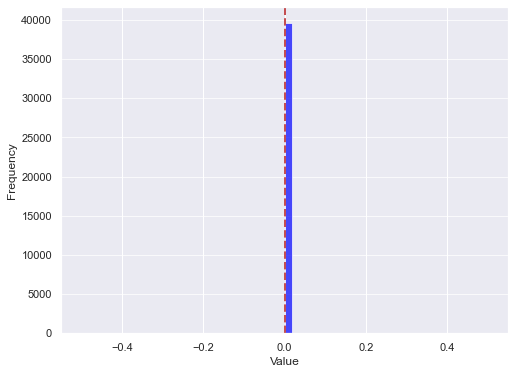

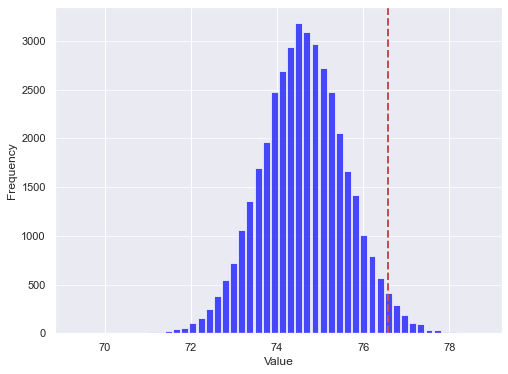

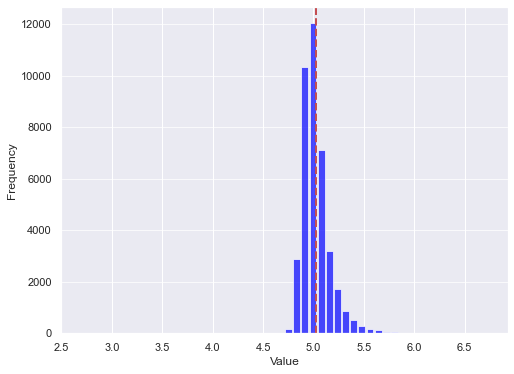

In [15]:
plot_hist(data, 'min', title='swi_Min_Value_Distribution')
plot_hist(data, 'max', title='swi_Value_Distribution')
plot_hist(data, 'norm99p', title='swi_norm99p_Value_Distribution')

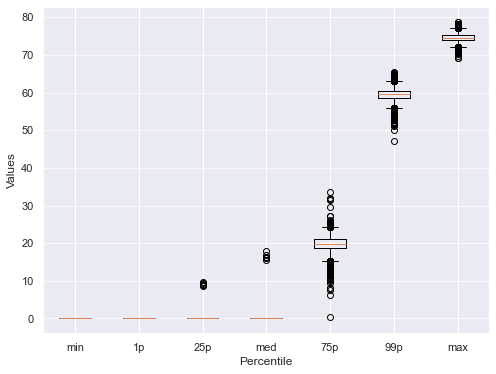

In [7]:
plot_bars(data, ['min', '1p', '25p', 'med', '75p','99p', 'max'], 'swi_Voxel_Intensity_Value_Distribution')

In [8]:
data['min_corrected'] = data['min'] / data['mean']
data['max_corrected'] = data['max'] / data['mean']

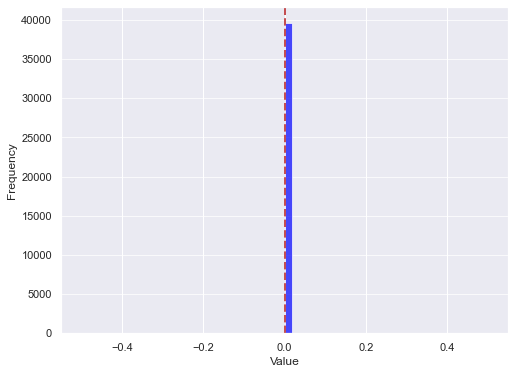

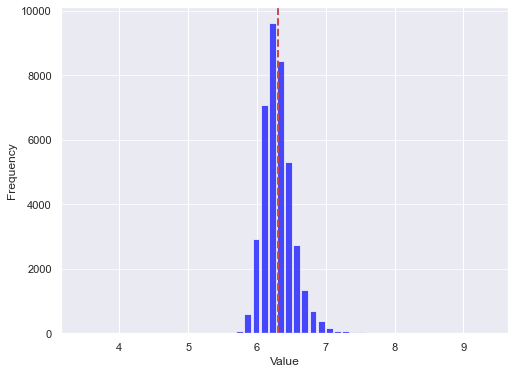

In [9]:
plot_hist(data, 'min_corrected', title='misc')
plot_hist(data, 'max_corrected', title='misc')

In [10]:
data['min_norm'] = data['min_corrected'] / np.mean(data['norm99p'])
data['max_norm'] = data['max_corrected'] / np.mean(data['norm99p'])

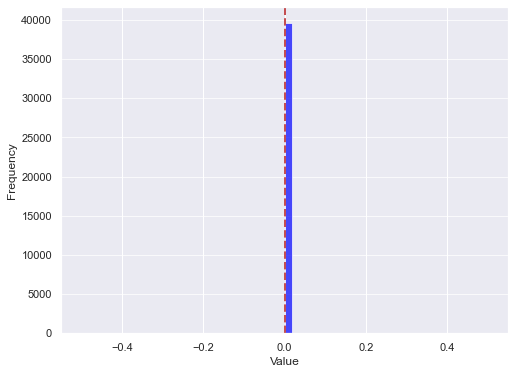

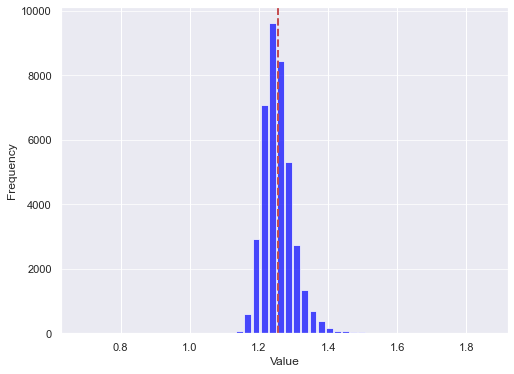

In [11]:
plot_hist(data, 'min_norm', title='misc')
plot_hist(data, 'max_norm', title='misc')

In [14]:
min_scale = data['min'].mean() - data['min'].std()*2
max_scale = data['max'].mean() + data['max'].std()*2
data_scale = max(abs(min_scale), abs(max_scale))
print(data_scale)

data['min_scaled'] = data['min'] / data_scale
data['max_scaled'] = data['max'] / data_scale

76.58003036598346


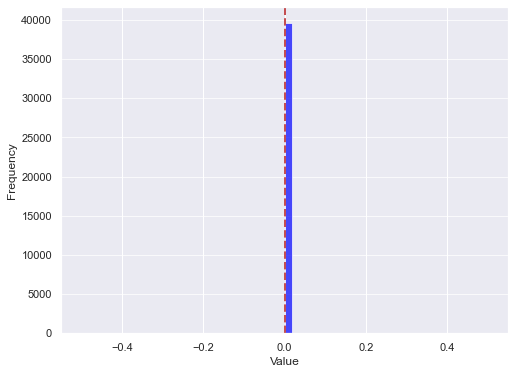

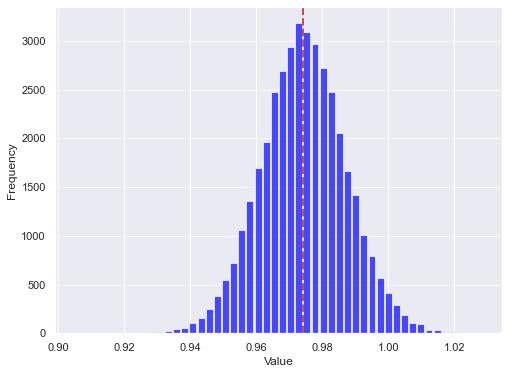

In [13]:
plot_hist(data, 'min_scaled', title='misc')
plot_hist(data, 'max_scaled', title='misc')